In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


Version of the analysis code which only looks at the histograms stored in the data file. This will be the only version which is possible when analyzing the full dataset (unless you want a 1 TB root file to loop through)

In [2]:
f = r.TFile("./data/gm2offline_ana.root") #a single subrun from the 9day produced for testing purposes

---

Lets first look at the comparison plots

Info in <TCanvas::SaveAs>: ROOT file ./images/DeltaX_vs_DeltaY.root has been created


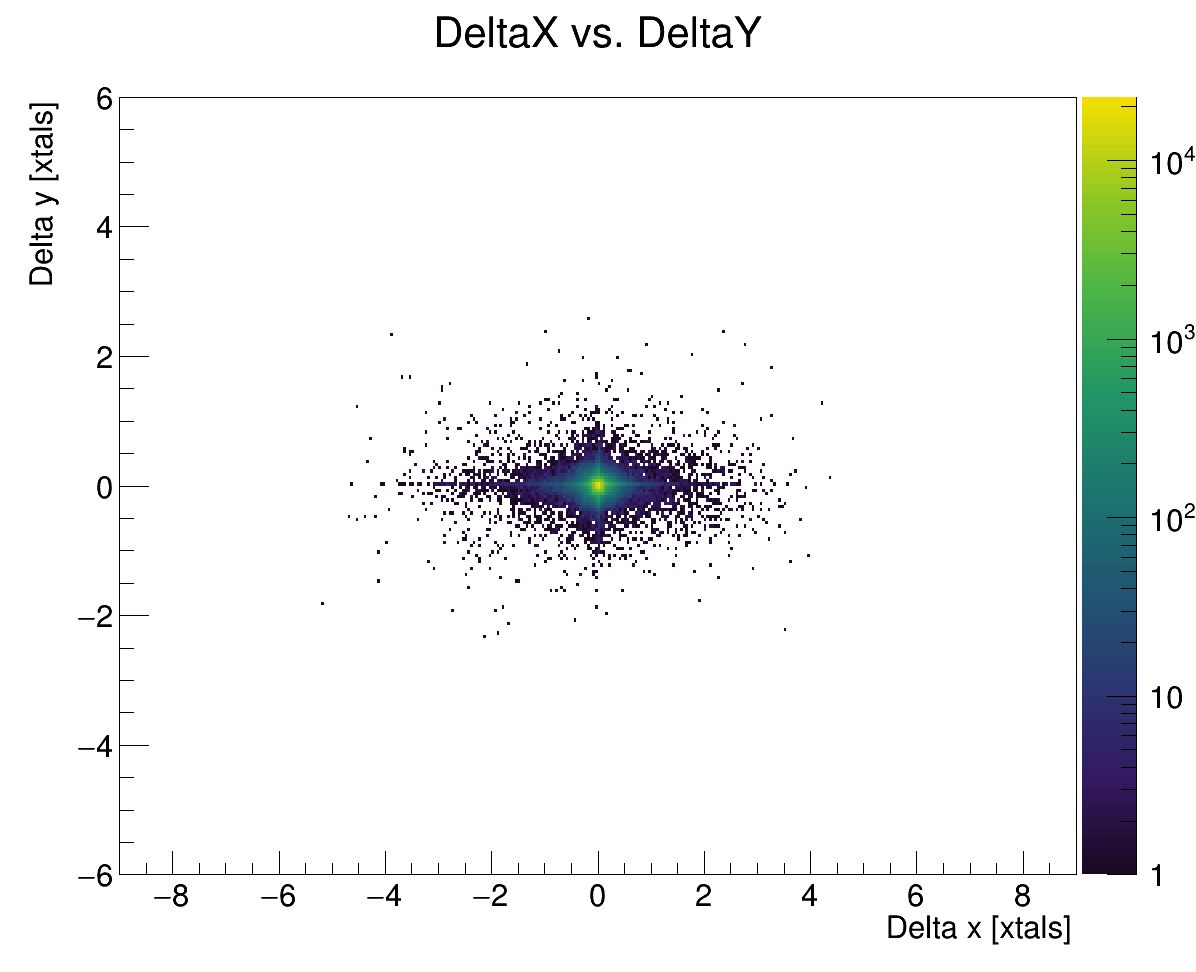

In [3]:
c2 = r.TCanvas("c2","c2",1200,1000)
hdeltaxy = f.Get("farline").Get("evwDeltaXDeltaY").Clone()
hdeltaxy.Draw("COLZ")
hdeltaxy.Rebin2D(5,5)
hdeltaxy.GetXaxis().SetRangeUser(-9,9)
hdeltaxy.GetYaxis().SetRangeUser(-6,6)

if(False):
    radiusX = 1
    radiusY = 0.5
    ell = r.TEllipse(0.,0.,radiusX,radiusY)
    ell.SetFillColorAlpha(46,0.4)
    ell.Draw()

    t = r.TText(5.5,5.5,"Radius = "+str(radiusX)+"(x) / "+str(radiusY)+"(y) xtals")
    t.SetTextAlign(22)
    t.SetTextColor(8)
    t.SetTextFont(43)
    t.SetTextSize(20)
    t.SetTextAngle(0)
    t.Draw()


c2.SetLogz()
c2.Draw()
c2.Print("./images/DeltaX_vs_DeltaY.root")

In [4]:
hdeltaxy.GetEntries()

187473.0

Info in <TCanvas::SaveAs>: ROOT file ./images/DeltaX_DeltaY.root has been created


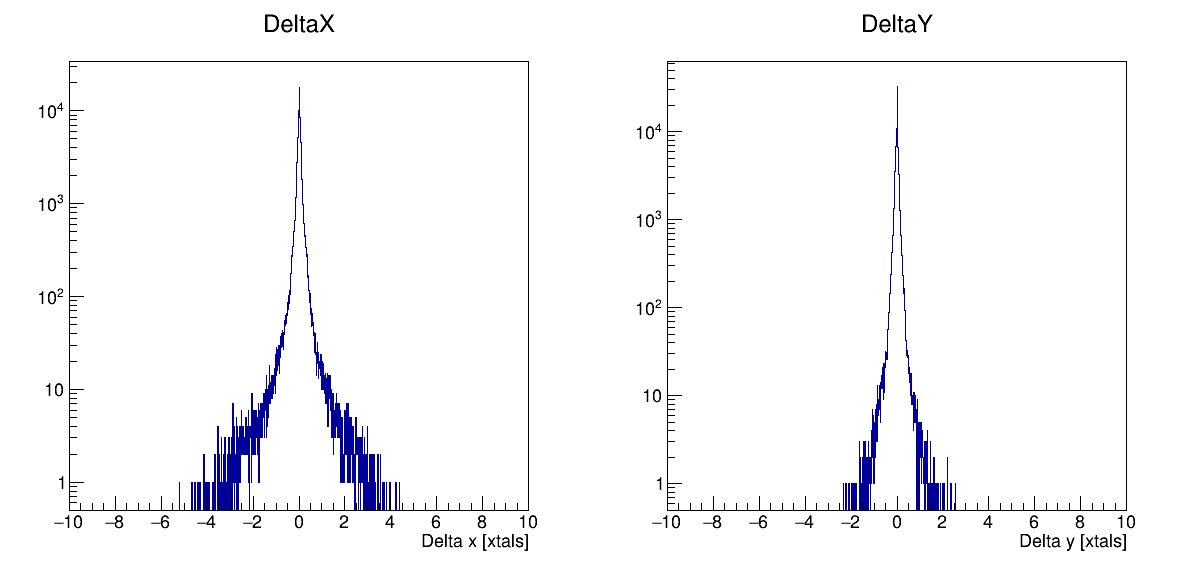

In [5]:
hdeltaxy = f.Get("farline").Get("evwDeltaXDeltaY").Clone()
hdeltaxy.GetXaxis().SetRangeUser(-10,10)
hdeltaxy.GetYaxis().SetRangeUser(-10,10)

c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)
c3.cd(1)
r.gPad.SetLogy()
hdeltax = hdeltaxy.ProjectionX().Clone()
hdeltax.SetTitle("DeltaX")
hdeltax.Draw()

c3.cd(2)
r.gPad.SetLogy()
hdeltay = hdeltaxy.ProjectionY().Clone()
hdeltay.SetTitle("DeltaY")
hdeltay.Draw()

c3.Draw()
c3.Print("./images/DeltaX_DeltaY.root")

2000
[19.663631562945064, 29.53865356611352, 38.501544222368025, 46.224789703050575, 53.07911005851509, 59.025032938076414, 64.05455718956863, 68.38158028089379, 72.03170589898279, 75.18736031321843] ...


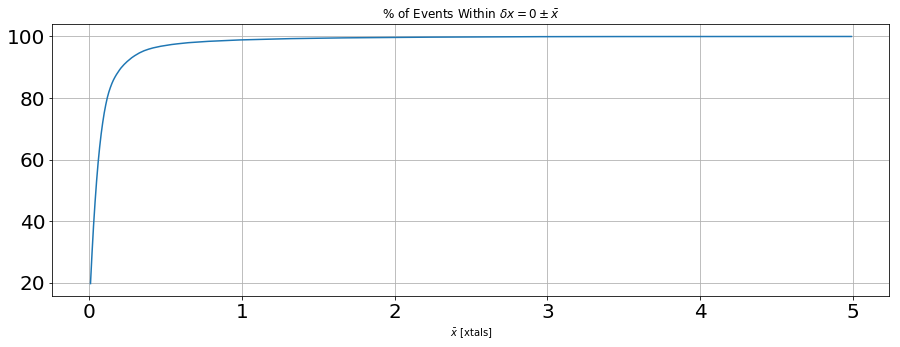

In [6]:
integralsX = []

nbins = hdeltax.GetSize() - 2
print(nbins)

xranges = []

totalIntegral =  hdeltax.Integral(0,-1)

for i in range(1,500,1):
    high, low = int(nbins/2 - i), int(nbins/2 + i)
    xrange = i*20./nbins
    integralsX.append( hdeltax.Integral(high, low) / totalIntegral * 100)
    xranges.append(xrange)
    
print(integralsX[0:10],"...")
#print(xranges)

plt.subplots(figsize=(15,5))
plt.plot(xranges,integralsX,'-')
plt.title(r'% of Events Within $\delta x = 0 \pm \bar{x}$')
plt.xlabel(r'$\bar{x}$ [xtals]')
plt.grid()
plt.show()

2000


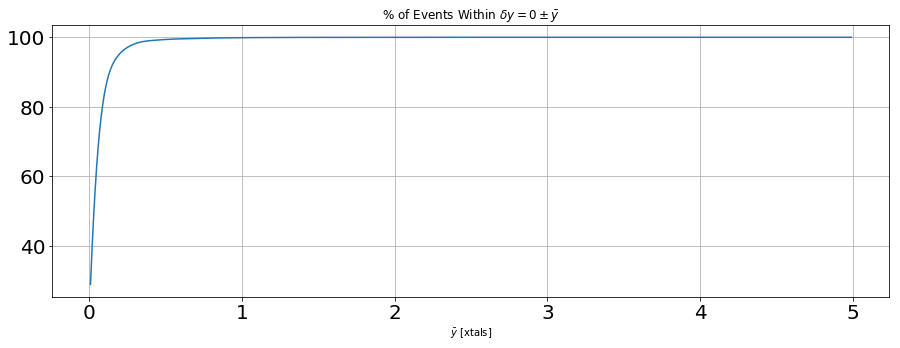

In [7]:
integralsY = []

nbins = hdeltay.GetSize() - 2
print(nbins)

yranges = []

totalIntegral =  hdeltay.Integral(0,-1)

for i in range(1,500,1):
    high, low = int(nbins/2 - i), int(nbins/2 + i)
    yrange = i*20./nbins
    integralsY.append( hdeltay.Integral(high, low) / totalIntegral * 100)
    yranges.append(yrange)


plt.subplots(figsize=(15,5))
plt.plot(yranges,integralsY,'-')
plt.title(r'% of Events Within $\delta y = 0 \pm \bar{y}$')
plt.xlabel(r'$\bar{y}$ [xtals]')
plt.grid()
plt.show()

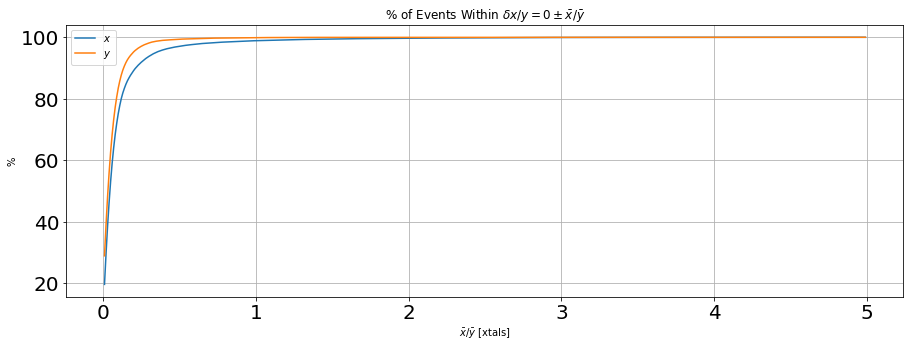

In [8]:
plt.subplots(figsize=(15,5))
plt.plot(xranges,integralsX,'-',label=r'$x$')
plt.plot(yranges,integralsY,'-',label=r'$y$')

plt.title(r'% of Events Within $\delta x/y = 0 \pm \bar{x}/\bar{y}$')
plt.xlabel(r'$\bar{x} / \bar{y}$ [xtals]')
plt.ylabel('%')
plt.legend()
plt.grid()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


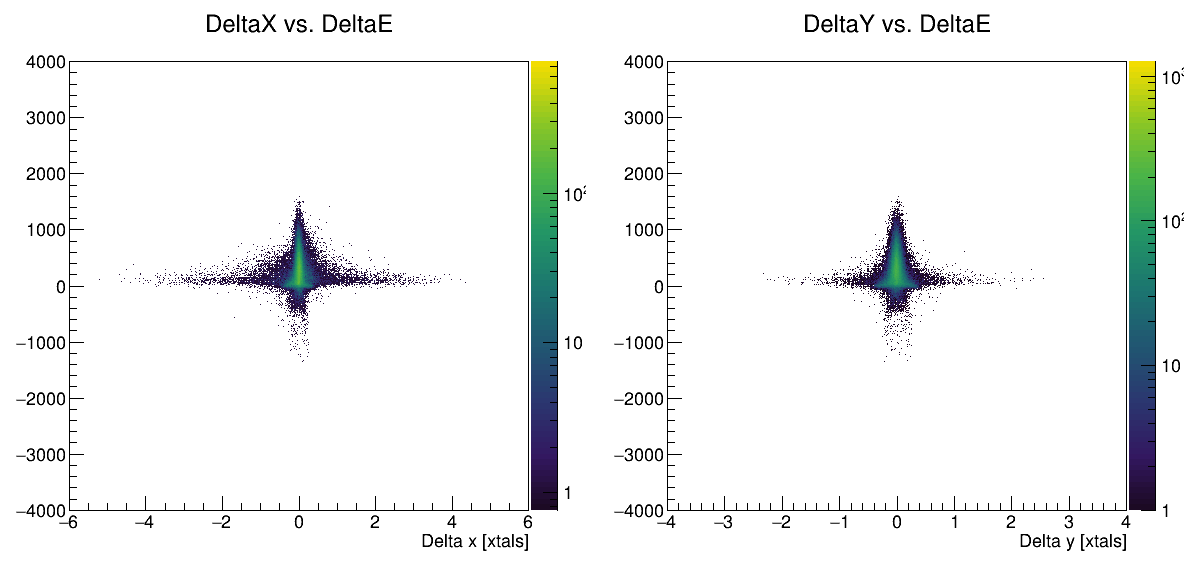

In [9]:
c2 = r.TCanvas("c2","c2",1200,600)
c2.Divide(2)
c2.cd(1)
evwDeltaXDeltaE = f.Get("farline").Get("evwDeltaXDeltaE").Clone()
evwDeltaXDeltaE.Draw("colz")
#evwDeltaXDeltaE.Rebin2D(5,5)
evwDeltaXDeltaE.GetXaxis().SetRangeUser(-6,6)
evwDeltaXDeltaE.GetYaxis().SetRangeUser(-4000,4000)
r.gPad.SetLogz()
c2.cd(2)
evwDeltaYDeltaE = f.Get("farline").Get("evwDeltaYDeltaE").Clone()
evwDeltaYDeltaE.Draw("colz")
#evwDeltaYDeltaE.Rebin2D(5,5)
evwDeltaYDeltaE.GetXaxis().SetRangeUser(-4,4)
evwDeltaYDeltaE.GetYaxis().SetRangeUser(-4000,4000)
r.gPad.SetLogz()
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


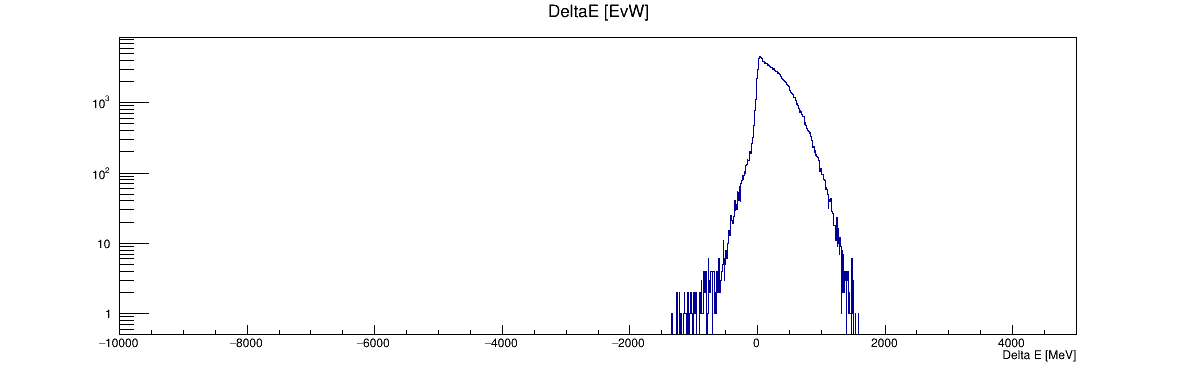

In [10]:
c2 = r.TCanvas("c2","c2",1200,400)
evwDeltaE = f.Get("farline").Get("evwDeltaXDeltaE").Clone().ProjectionY()
evwDeltaE.SetTitle("DeltaE [EvW]")
evwDeltaE.Draw()
c2.SetLogy()
c2.Draw()

In [11]:
print(evwDeltaE.GetMean())

275.216823677751


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


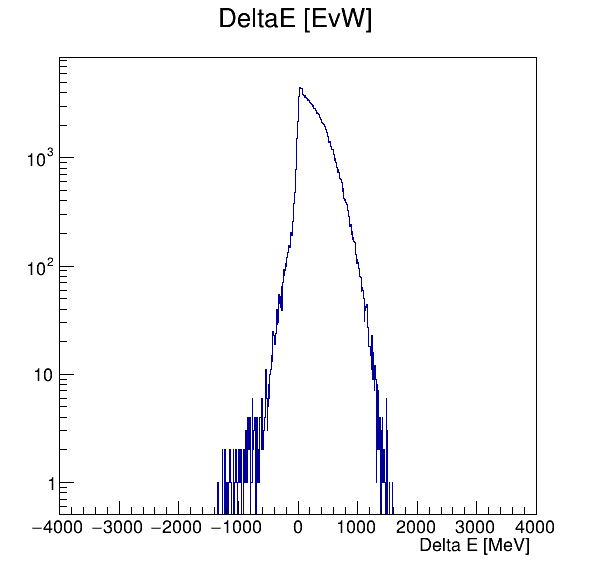

In [12]:
c2 = r.TCanvas("c2","c2",600,600)
evwDeltaE = f.Get("farline").Get("evwDeltaXDeltaE").Clone().ProjectionY()
evwDeltaE.SetTitle("DeltaE [EvW]")


evwDeltaE.GetXaxis().SetRangeUser(-4000,4000)

evwDeltaE.Draw()
c2.SetLogy()
c2.Draw()


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  7.75449e+07
NDf                       =        21571
Edm                       =   6.7619e-13
NCalls                    =           41
p0                        =            0                      	 (fixed)
p1                        =      1.28795   +/-   0.00129081  


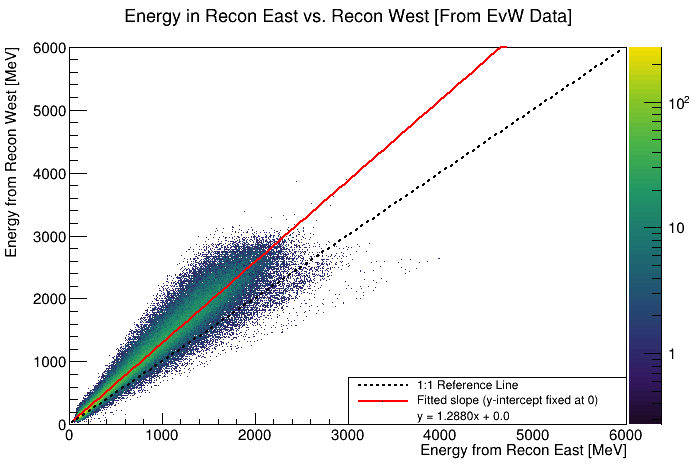

In [13]:
r.gStyle.SetOptFit(0)

c3 = r.TCanvas()
evwEnergyEvW = f.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.SetTitle("Energy in Recon East vs. Recon West [From EvW Data]")
#evwEnergyEvW.GetXaxis().SetRangeUser(0,3000)
#evwEnergyEvW.GetYaxis().SetRangeUser(0,4000)
evwEnergyEvW.Draw("colz")

onetoone = r.TF1("onetoone","pol1",0,6000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

actualslope = r.TF1("actualslope","pol1",0,6000)
actualslope.FixParameter(0,0)
evwEnergyEvW.Fit("actualslope","REMB")

leg = r.TLegend(0.5,0.1,0.9,0.2)
leg.AddEntry(onetoone ,"1:1 Reference Line", "l")
leg.AddEntry(actualslope ,"Fitted slope (y-intercept fixed at 0)", "pl")
leg.AddEntry(actualslope ,"y = "+str("%.4f" % round(actualslope.GetParameter(1),4))+"x + "+str(actualslope.GetParameter(0)), "")
leg.Draw()

c3.SetLogz()
c3.Draw()

6000


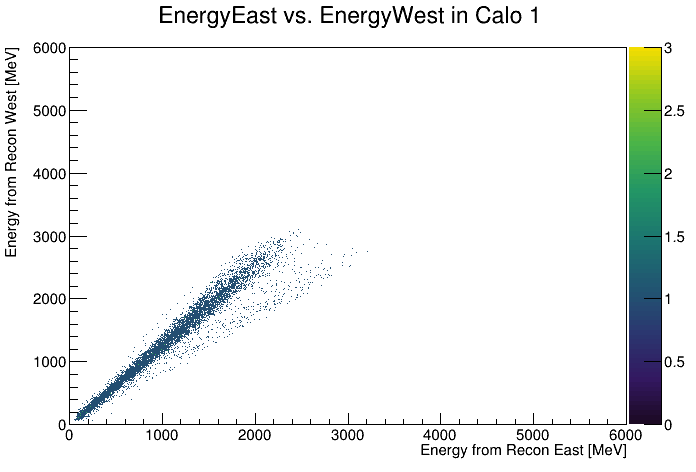

In [14]:
calo = 1
c = r.TCanvas()
f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").Draw("colz")
print(f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").GetNbinsX())
c.Draw()

Lets see if this slope is an especially calorimeter dependent effect

starting calo 1
6000
starting calo 2
6000
starting calo 3
6000
starting calo 4
6000
starting calo 5
6000
starting calo 6
6000
starting calo 7
6000
starting calo 8
6000
starting calo 9
6000
starting calo 10
6000
starting calo 11
6000
starting calo 12
6000
starting calo 13
6000
starting calo 14
6000
starting calo 15
6000
starting calo 16
6000
starting calo 17
6000
starting calo 18
6000
starting calo 19
6000
starting calo 20
6000
starting calo 21
6000
starting calo 22
6000
starting calo 23
6000
starting calo 24
6000
drawing calo 1 <ROOT.TH2I object ("h1") at 0x7ffff53ab530>
6000
3000
drawing calo 2 <ROOT.TH2I object ("h2") at 0x7ffff53ab120>
6000
3000
drawing calo 3 <ROOT.TH2I object ("h3") at 0x7ffff43c1af0>
6000
3000
drawing calo 4 <ROOT.TH2I object ("h4") at 0x7ffff43cc6b0>
6000
3000
drawing calo 5 <ROOT.TH2I object ("h5") at 0x7ffff43bd6d0>
6000
3000
drawing calo 6 <ROOT.TH2I object ("h6") at 0x7ffff5118d90>
6000
3000
drawing calo 7 <ROOT.TH2I object ("h7") at 0x7ffff5131b20>
6000
300

Info in <TCanvas::SaveAs>: ROOT file ./images/EnergyEast_vs_EnergyWest_byCalo.root has been created


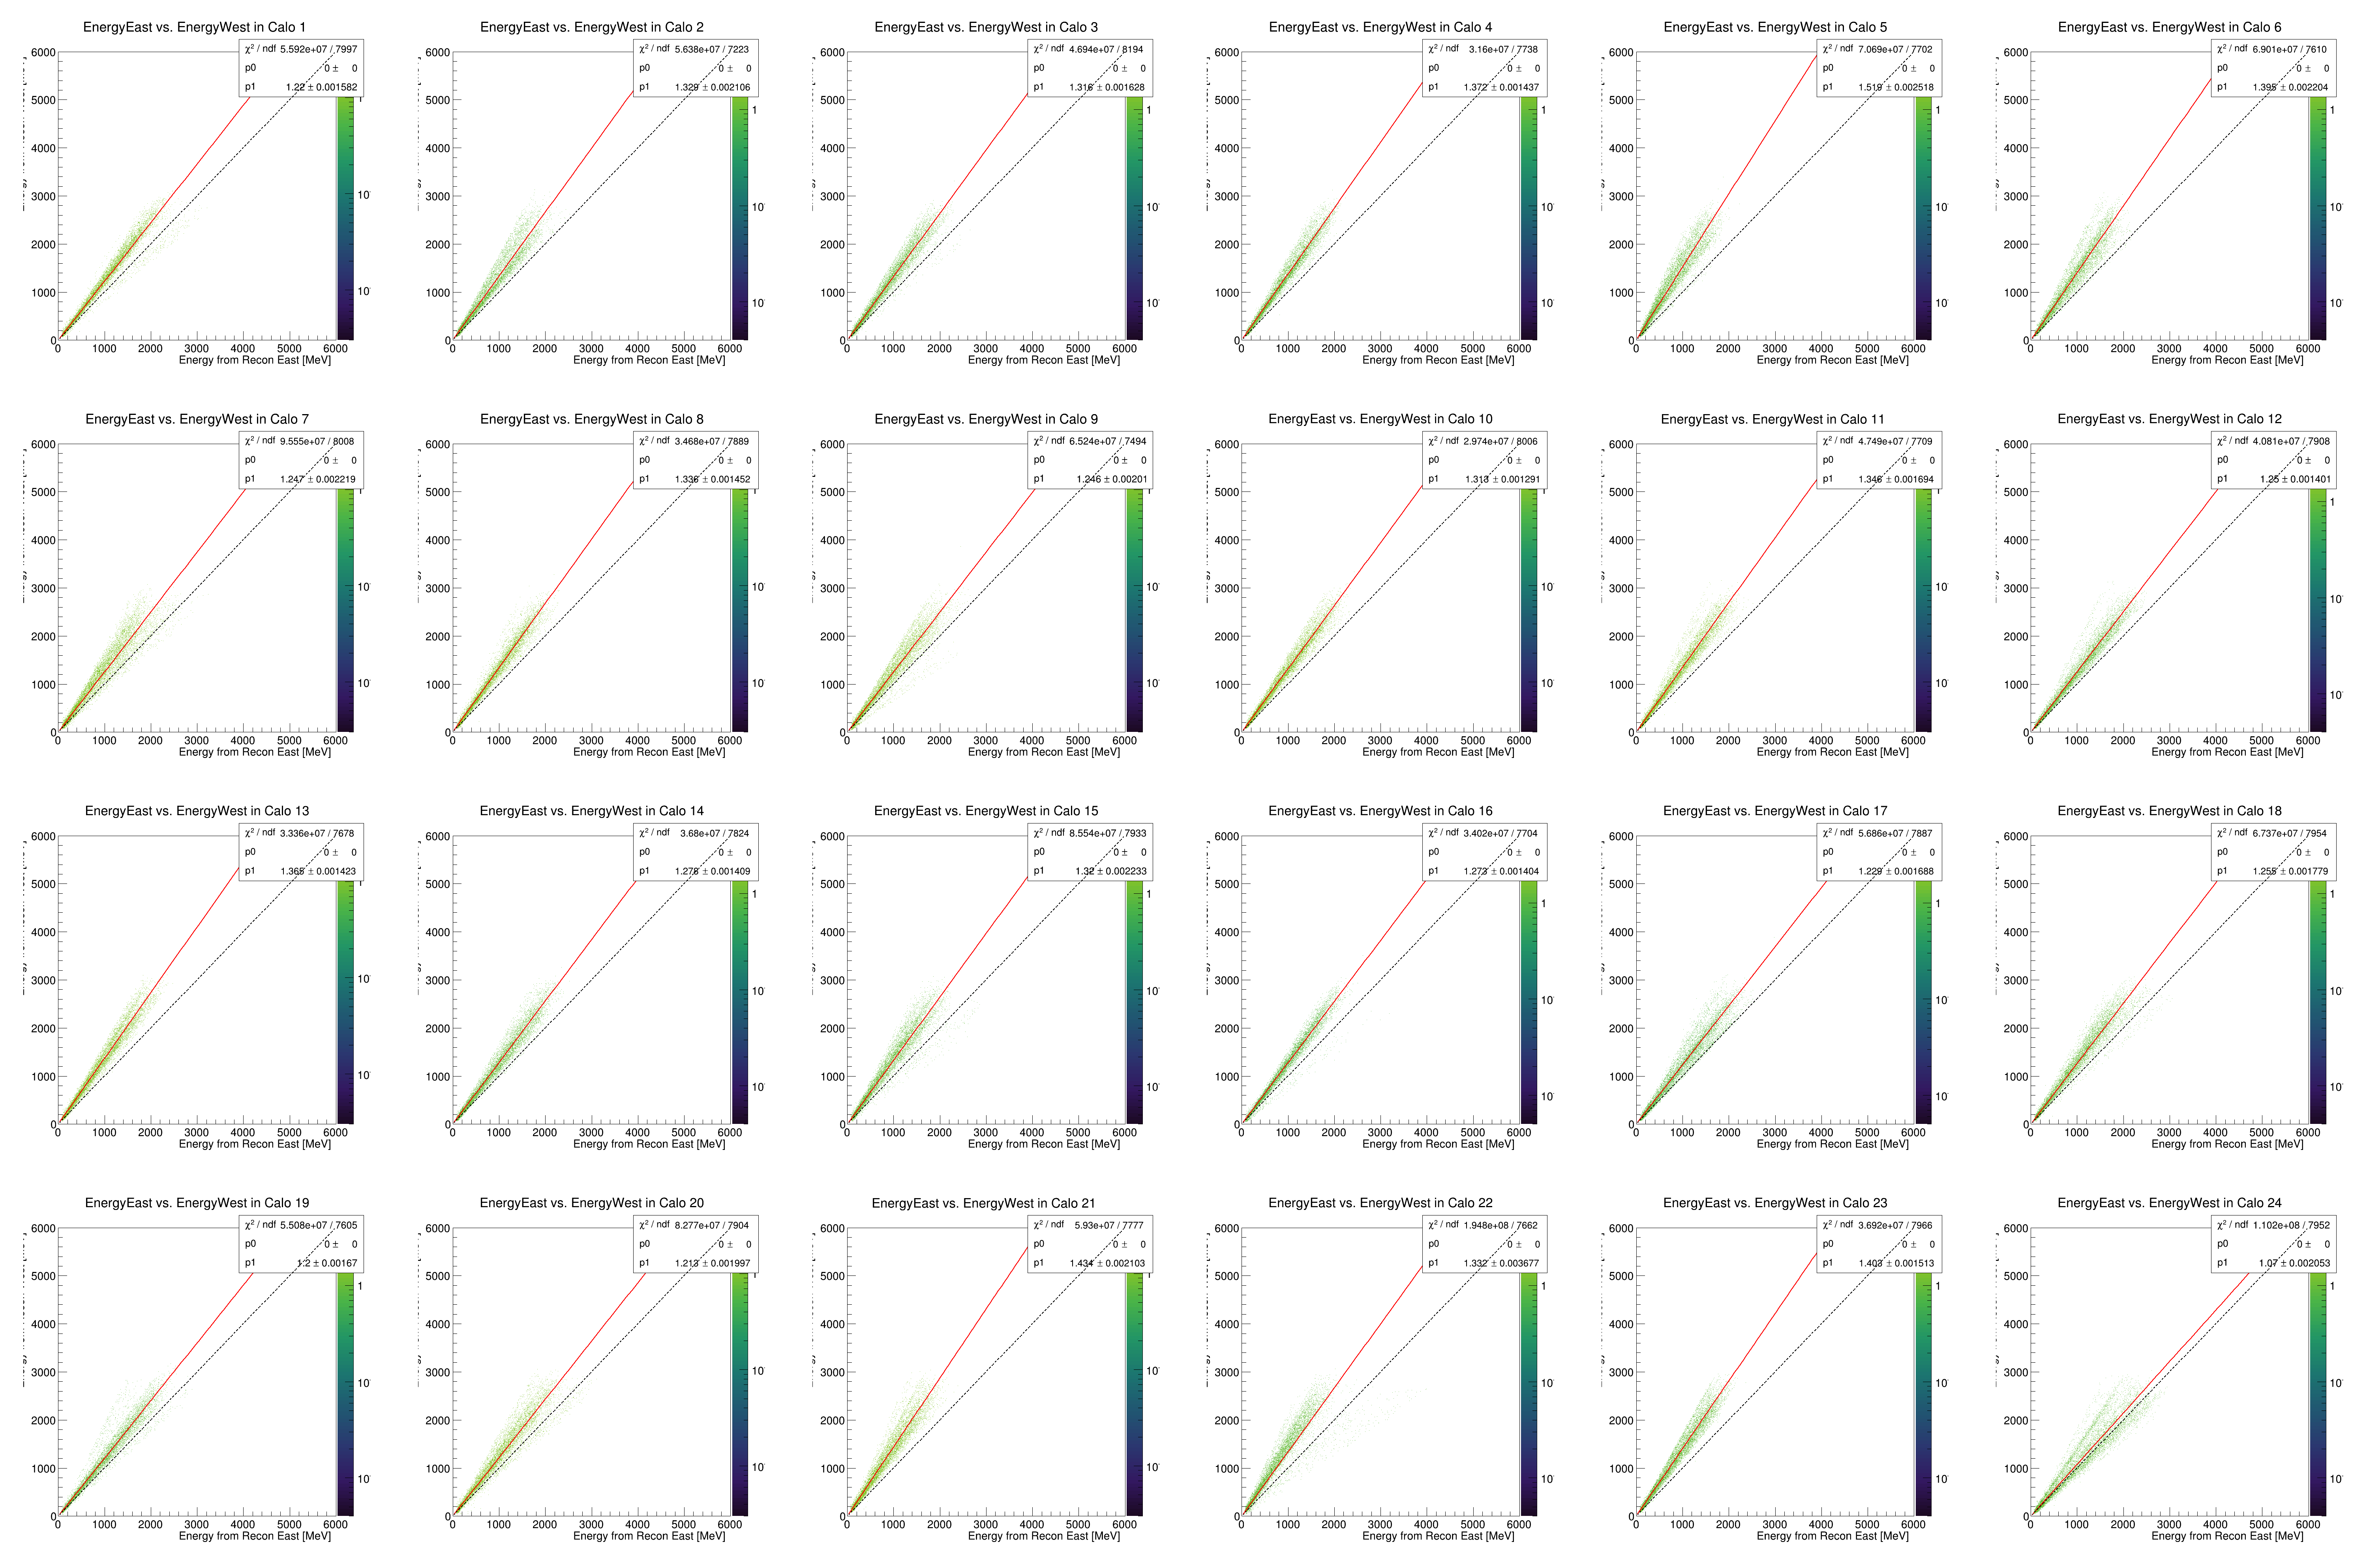

In [15]:
r.gStyle.SetOptFit(1)

evwEnergyEvWvec = []
for calo in range(1,25):
    print("starting calo", calo)
    evwEnergyEvW_i = f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").Clone()
    print( evwEnergyEvW_i.GetNbinsX() )
    evwEnergyEvWvec.append( evwEnergyEvW_i.Clone( "h"+str(calo) ) )
    #evwEnergyEvWvec[calo-1].Rebin2D(5,5)
    
c5 = r.TCanvas("c5","c5",6000,4000)
c5.Divide(6,4)

actualslope_i = r.TF1("actualslope_i","pol1",0,6000)
actualslope_i.FixParameter(0,0)

slopeVec = []

for i, hist in enumerate(evwEnergyEvWvec):
    print("drawing calo", i+1, hist)
    c5.cd(i+1)
    r.gPad.SetLogz()
    print(hist.GetNbinsX())
    hist.Rebin2D(2,2)
    print(hist.GetNbinsX())
    hist.GetXaxis().SetRangeUser(0,6000)
    hist.GetYaxis().SetRangeUser(0,6000)
    
    hist.Fit("actualslope_i","REMBQ")
    hist.Draw("COLZ")
    onetoone.Draw("SAME")
    
    slopeVec.append(actualslope_i.GetParameter(1))
    
c5.Draw()
c5.Print("./images/EnergyEast_vs_EnergyWest_byCalo.root")

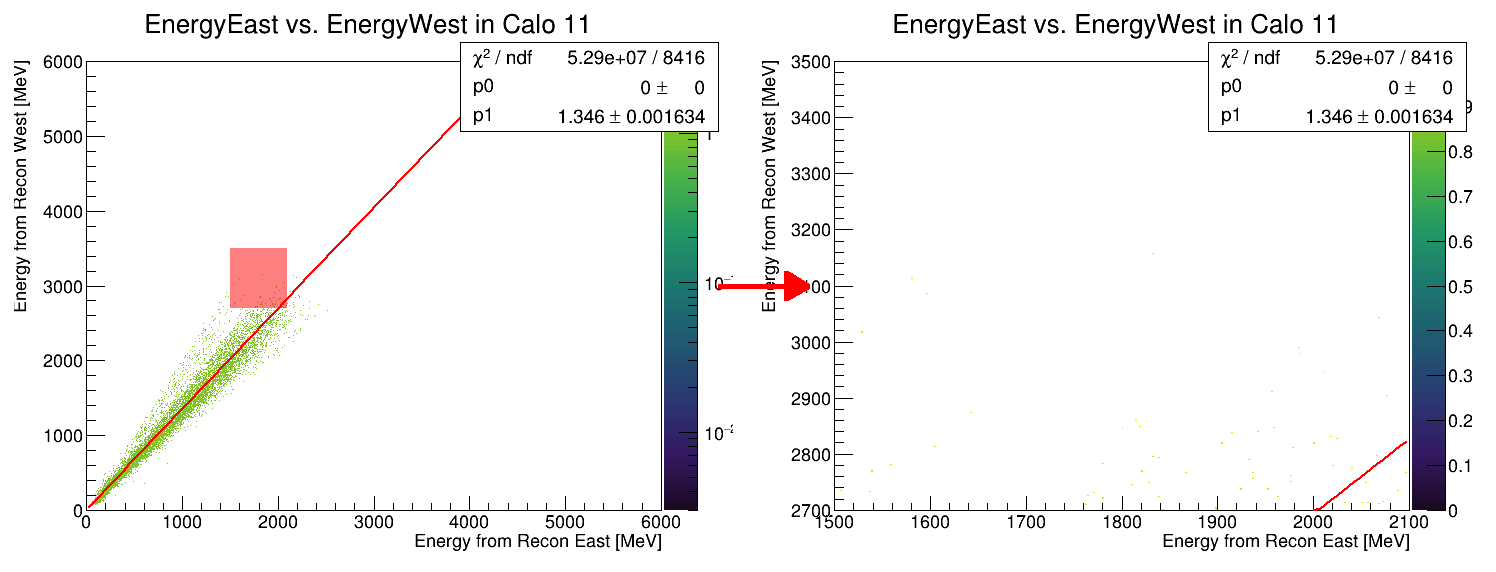

In [17]:
xlims = [1500,2100]
ylims = [2700,3500]

plotNum = 10

c = r.TCanvas("c","c",1500,600)
c.Divide(2)
c.cd(1)

evwEnergyEvWvec[plotNum].Draw("COLZ")
box = r.TBox(xlims[0],ylims[0],xlims[1],ylims[1])
box.SetFillColorAlpha(2,0.5)
box.Draw("SAME")
r.gPad.SetLogz()

c.cd(2)
hdeltaxy_subset = evwEnergyEvWvec[plotNum].Clone()
hdeltaxy_subset.GetXaxis().SetRangeUser(xlims[0],xlims[1])
hdeltaxy_subset.GetYaxis().SetRangeUser(ylims[0],ylims[1])
#r.gPad.SetLogz()
hdeltaxy_subset.Draw("COLZ")


c.cd(0)

ar4 = r.TArrow(0.48,0.5,0.54,0.50,0.02,"|>")
ar4.SetLineWidth(5)
ar4.SetLineColor(2)
ar4.SetFillColor(2)
ar4.Draw()

c.Draw()

[1.2199747091271853, 1.3289679767647964, 1.3161464568121544, 1.3718905149655882, 1.519028168090333, 1.3946522002045993, 1.2472325206703692, 1.3364135169388462, 1.2459604765992267, 1.3131383751374, 1.3456162810936687, 1.2498610552500657, 1.3653437884159618, 1.2782557089374598, 1.319818859515178, 1.2729924766850382, 1.2286715384787477, 1.2548743984635975, 1.199799090353178, 1.2127923070416364, 1.4339623181123713, 1.3317621933211317, 1.4030005636202019, 1.070386848949394]


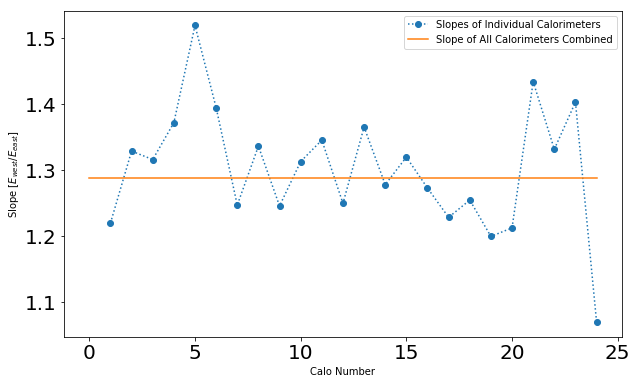

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
plt.rcParams['figure.facecolor'] = 'white'
plt.plot([x for x in range(1,25)],slopeVec,'o:',label='Slopes of Individual Calorimeters')
print(slopeVec)
plt.plot([0,24],[actualslope.GetParameter(1),actualslope.GetParameter(1)], label='Slope of All Calorimeters Combined')
plt.xlabel("Calo Number")
plt.ylabel("Slope [$E_{west} / E_{east}$]")
plt.legend()
plt.show()

In [17]:
v9_08_caloSlopes = [1.2508564861011808, 1.2272375877992845, 1.3373450767407817, 1.3275237070360235, 1.1978395489775076, 1.3246766560857643, 1.3073367709357195, 1.2714499797813235, 1.317277828888435, 1.284399327818143, 1.2857198641976753, 1.3172351836881047, 1.3113130399048107, 1.2944653097286924, 1.2905070352069026, 1.287792452923369, 1.3140409323510234, 1.3314549770330193, 1.2708323887161304, 1.291913333078092, 1.1998513684568337, 1.253426964838598, 1.215613318441804, 1.242614945873273]

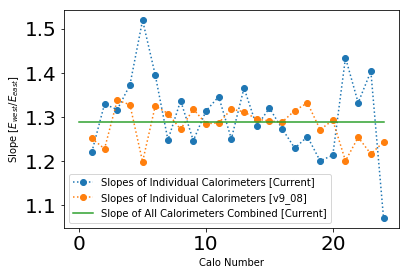

1.2879543905082733


In [18]:
# fig, ax = plt.subplots(figsize=(10,6))
plt.plot([x for x in range(1,25)],slopeVec,'o:',label='Slopes of Individual Calorimeters [Current]')
plt.plot([x for x in range(1,25)],v9_08_caloSlopes,'o:',label='Slopes of Individual Calorimeters [v9_08]')
plt.plot([0,24],[actualslope.GetParameter(1),actualslope.GetParameter(1)], label='Slope of All Calorimeters Combined [Current]')
plt.xlabel("Calo Number")
plt.ylabel("Slope [$E_{west} / E_{east}$]")
plt.legend()
plt.show()

print(actualslope.GetParameter(1))

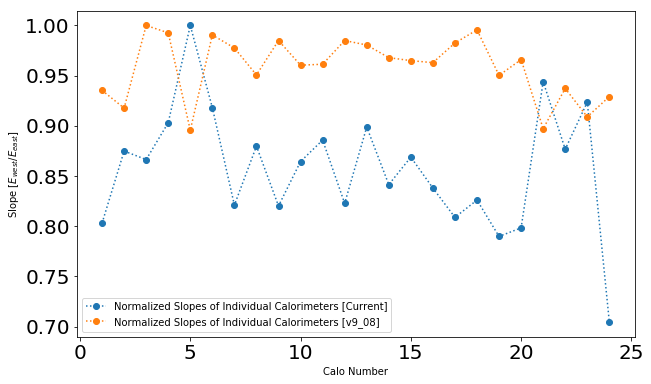

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot([x for x in range(1,25)],[x/max(slopeVec) for x in slopeVec],'o:',label='Normalized Slopes of Individual Calorimeters [Current]')
plt.plot([x for x in range(1,25)],[x/max(v9_08_caloSlopes) for x in v9_08_caloSlopes],'o:',label='Normalized Slopes of Individual Calorimeters [v9_08]')
plt.xlabel("Calo Number")
plt.ylabel("Slope [$E_{west} / E_{east}$]")
plt.legend()
plt.show()


****************************************
Minimizer is Linear
Chi2                      =     0.178794
NDf                       =           22
p0                        =      1.34823   +/-   0.0379847   
p1                        =  -0.00365658   +/-   0.00265837  


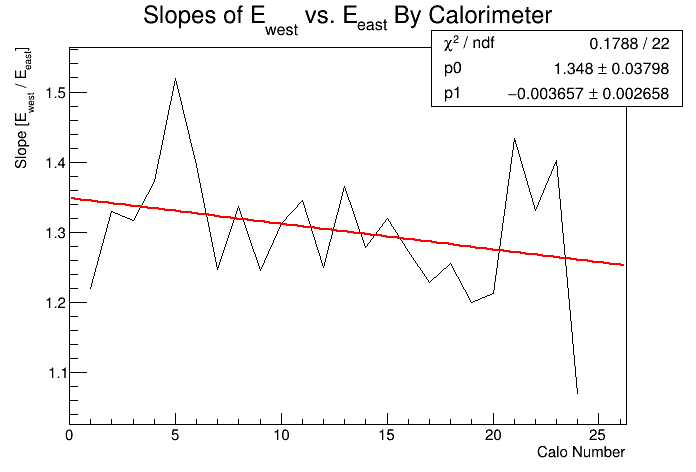

In [20]:
gr = r.TGraph()
for i,entry in enumerate(slopeVec):
    gr.SetPoint(i,i+1,entry)
c = r.TCanvas()
gr.SetTitle("Slopes of E_{west} vs. E_{east} By Calorimeter")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("Slope [E_{west} / E_{east}]")
gr.Draw("apl")
gr.Fit("pol1")
c.Draw()


****************************************
Minimizer is Linear
Chi2                      =     0.178794
NDf                       =           22
p0                        =      1.34457   +/-   0.0356823   
p1                        =   -0.0139671   +/-   0.0101542   


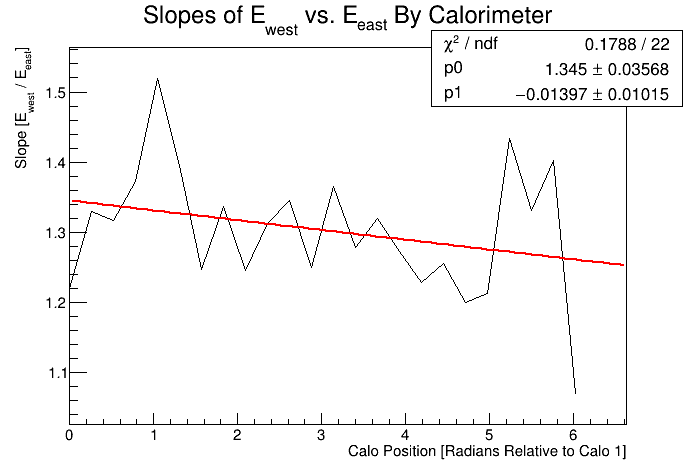

In [21]:
gr = r.TGraph()
for i,entry in enumerate(slopeVec):
    gr.SetPoint(i,i*2*r.TMath.Pi()/24,entry)
c = r.TCanvas()
gr.SetTitle("Slopes of E_{west} vs. E_{east} By Calorimeter")
gr.GetXaxis().SetTitle("Calo Position [Radians Relative to Calo 1]")
gr.GetYaxis().SetTitle("Slope [E_{west} / E_{east}]")
gr.Draw("apl")
gr.Fit("pol1")
c.Draw()

We can also make the same plots for the WvE graphs, and then compare to make sure everything is still kosher

Info in <TCanvas::SaveAs>: ROOT file ./images/EvW_DeltaT_Calo.root has been created


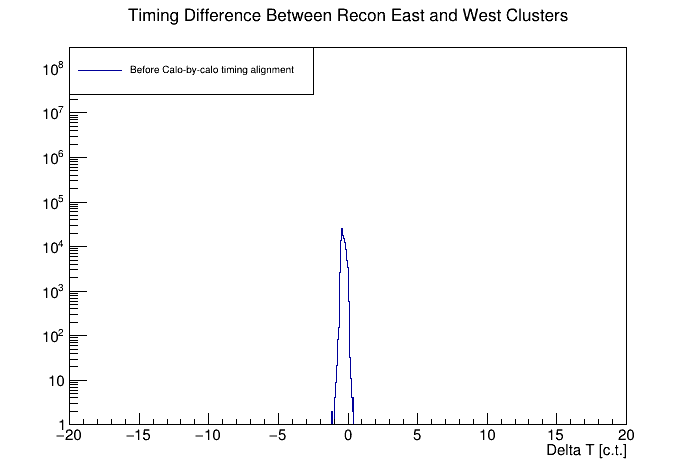

In [22]:
c = r.TCanvas()
evwDeltaTCalo = f.Get("farline").Get("evwDeltaTCalo").ProjectionX().Clone()
evwDeltaTCalo.SetTitle("Timing Difference Between Recon East and West Clusters")
evwDeltaTCalo.Draw()

#evwDeltaTCaloAfterCorr = f.Get("farline").Get("evwDeltaTCaloAfterCorr").ProjectionX().Clone()
#evwDeltaTCaloAfterCorr.SetLineColor(2)
#evwDeltaTCaloAfterCorr.Draw("SAME")

evwDeltaTCalo.GetYaxis().SetRangeUser(1,3*10**8)
#evwDeltaTCalo.GetXaxis().SetRangeUser(0,1)

leg = r.TLegend(0.1,0.8,0.45,0.9)
leg.AddEntry(evwDeltaTCalo ,"Before Calo-by-calo timing alignment", "l")
#leg.AddEntry(evwDeltaTCaloAfterCorr ,"After Calo-by-calo timing alignment", "l")
leg.Draw()

c.SetLogy()
c.Draw()
c.Print("./images/EvW_DeltaT_Calo.root")

Info in <TCanvas::SaveAs>: ROOT file ./images/EvW_DeltaT_Calo_BeforeAndAfter.root has been created


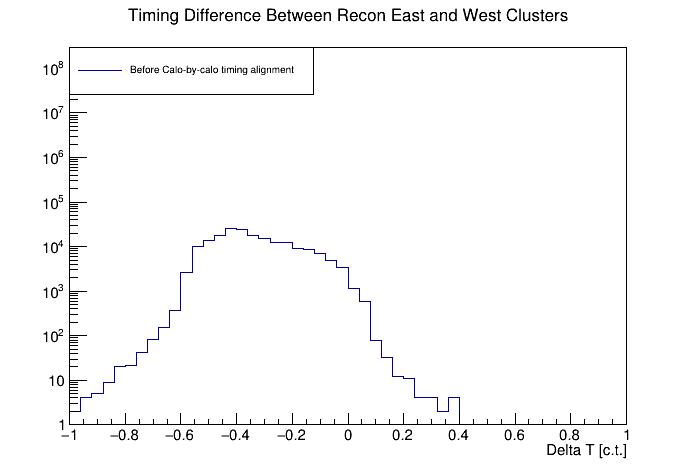

In [23]:
c = r.TCanvas()
evwDeltaTCalo.Draw()
#evwDeltaTCaloAfterCorr.Draw("SAME")

evwDeltaTCalo.GetYaxis().SetRangeUser(1,3*10**8)
evwDeltaTCalo.GetXaxis().SetRangeUser(-1,1)
leg.Draw()

c.SetLogy()
c.Draw()
c.Print("./images/EvW_DeltaT_Calo_BeforeAndAfter.root")

In [24]:
def peak_fit_bw(x, p):
    return p[0]*r.TMath.BreitWigner(x[0],p[1],p[2]) + p[3]

def peak_fit_cauchy(x, p):
    return p[0] * r.TMath.CauchyDist(x[0], p[1], p[2]) + p[3]

def peak_fit_doubleExp(x, p):
    return p[0] * r.TMath.LaplaceDist(x[0], p[1], p[2]) + p[3]

def peak_fit_voigt(x, p):
    return p[0] * r.TMath.Voigt(x[0], p[1], p[2], int(p[3])) + p[4]

def peak_fit_logGaus(x, p):
    return p[0] * r.TMath.Exp ( r.TMath.Gaus(x[0],p[1],p[2],False) ) + p[3]

def peak_fit_student(x, p):
    return p[0] * r.TMath.Student(p[1], p[2]) + p[3]



func1 = r.TF1("peak1", peak_fit_doubleExp, -3,3,5)
#func1.SetParNames('A','Mean','#gamma','+ C')
func1.SetParameters(1,.4,.1,0)
#func1.SetParLimits(1,.4,.45)
func1.SetLineColor(2)
func1.SetNpx(1000)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


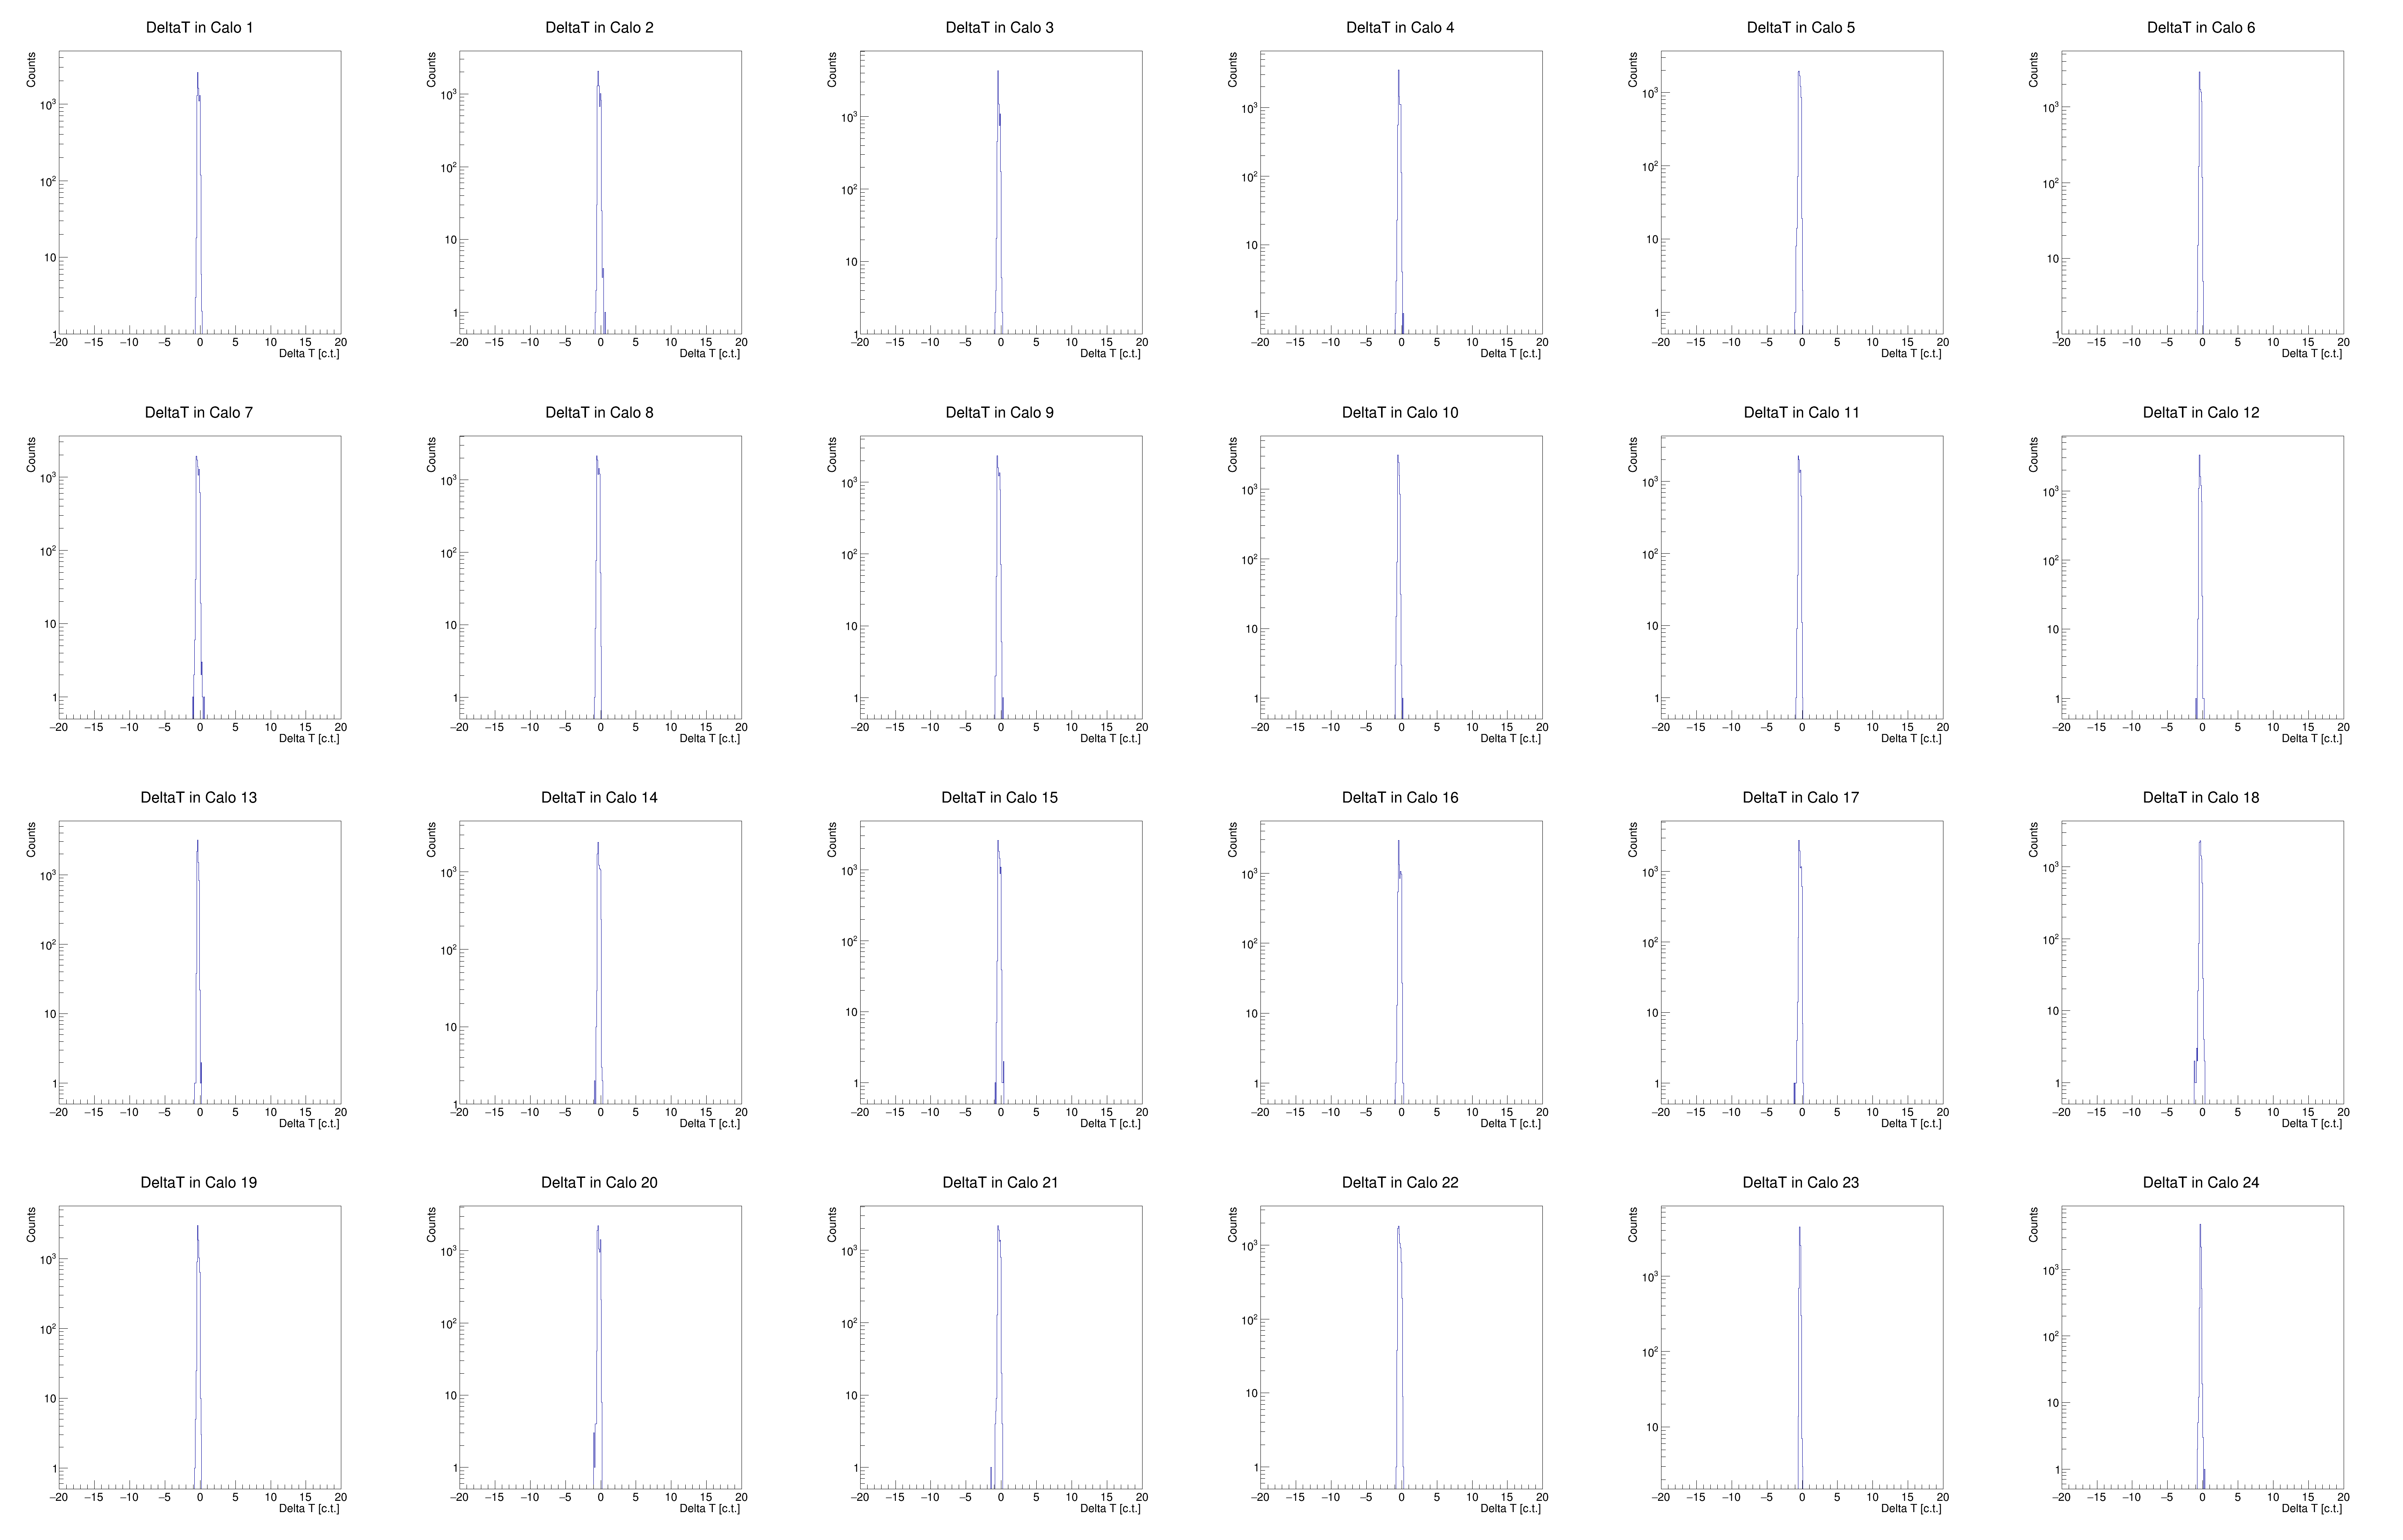

In [25]:
evwDeltaTvec = []
for calo in range(1,25):
    wveEnergyEvW_i = f.Get("farline").Get("evw_calo"+str(calo)).Get("evwDeltaT").Clone()
    evwDeltaTvec.append( wveEnergyEvW_i.Clone( "h"+str(calo) ) )
    
c5 = r.TCanvas("c5","c5",6200,4000)
c5.Divide(6,4)

for i, hist in enumerate(evwDeltaTvec):
    c5.cd(i+1)
    r.gPad.SetLogy()
    #hist.Rebin2D(5,5)
    hist.Draw("COLZ")
        
c5.Draw()
#c5.Print("./c5.root")

In [26]:
timeCorrectionConstants = []
for hi in evwDeltaTvec:
    timeCorrectionConstants.append( hi.GetMean() )
    
print(timeCorrectionConstants)

[-0.2622244092819443, -0.24088761980795417, -0.37642603663592483, -0.36874156268611613, -0.38747288549195125, -0.33773752504398125, -0.3455868299147924, -0.3811538270028116, -0.3960876515692018, -0.4490527855654843, -0.3984779753937084, -0.3811931652804726, -0.33713411360794987, -0.27158325382154874, -0.29678836995893015, -0.3266244041077867, -0.3211255006425558, -0.3015845204349759, -0.28530735403241403, -0.26847688523510427, -0.29939121967112986, -0.34293427856230635, -0.32584197451574404, -0.3150483493785404]


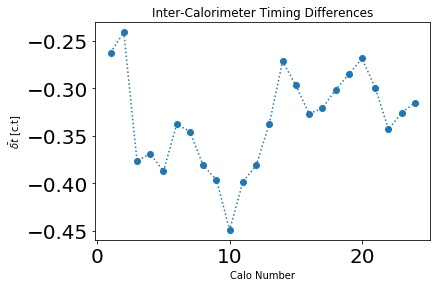

In [27]:
plt.plot([x+1 for x in range(24)],timeCorrectionConstants,'o:')
plt.title("Inter-Calorimeter Timing Differences")
plt.xlabel('Calo Number')
plt.ylabel(r"$\bar{\delta t}$ [c.t]")
plt.show()

In [28]:
v9_08timeconstants = [-2.1886727628212714, -2.5314258530103917, -2.43426185892008, -2.386595550136279, 
                      -0.2908762679000488, 0.538604239206295, 0.13934390451688286, -0.10100005508280471, 
                      -0.6764988302532722, -0.46900675029384975, -0.7232518604611012, -0.911334393422254, 
                      -0.004716659872673282, -0.18708331238893508, -0.5426331552242547, -0.2599619791955008, 
                      -0.7657443384936286, -0.9995150687797029, -0.9465523517444258, -0.94931882878597, 
                      -0.21651849142456392, -0.019902691377642553, -0.4720185353423848, 0.13792646339208234]

v9_11_partial_timeConstants = [-1.9927424710381956, -2.2327952709326433, -2.1094293252077803, -2.148967429368733, 
                               -0.02466230748844936, 0.6532349385165496, 0.4350607795018597, 0.14064319367828484, 
                               -0.3931196991567539, -0.3152627528891446, -0.5406804320480803, -0.5466881307366451, 
                               0.11806312504137442, 0.06296898245450647, -0.2283208361752229, -0.05252791197490053, 
                               -0.4921456912368829, -0.7013087263754624, -0.7137333158762289, -0.827710404308056, 
                               0.021333200986742643, 0.3431598724421979, 0.02901553411755545, 0.31523420095011445]

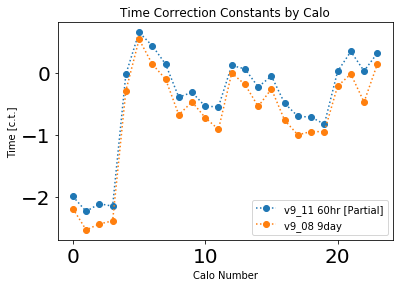

In [29]:
plt.plot(v9_11_partial_timeConstants,"o:",label='v9_11 60hr [Partial]')
plt.plot(v9_08timeconstants,"o:",label='v9_08 9day')
#plt.plot(timeCorrectionConstants,label='Current')
plt.title("Time Correction Constants by Calo")
plt.ylabel('Time [c.t.]')
plt.xlabel('Calo Number')
plt.legend()
plt.show()

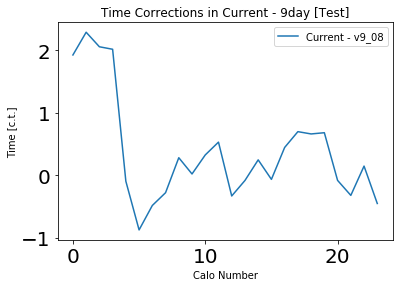

In [30]:
plt.plot([timeCorrectionConstants[i] - x for i, x in enumerate(v9_08timeconstants)],label='Current - v9_08')
plt.title("Time Corrections in Current - 9day [Test]")
plt.ylabel('Time [c.t.]')
plt.xlabel('Calo Number')
plt.legend()
plt.show()

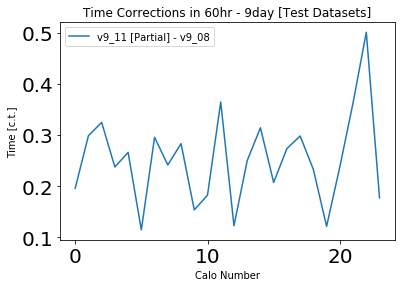

In [31]:
plt.plot([v9_11_partial_timeConstants[i] - x for i, x in enumerate(v9_08timeconstants)],label='v9_11 [Partial] - v9_08')
plt.title("Time Corrections in 60hr - 9day [Test Datasets]")
plt.ylabel('Time [c.t.]')
plt.xlabel('Calo Number')
plt.legend()
plt.show()

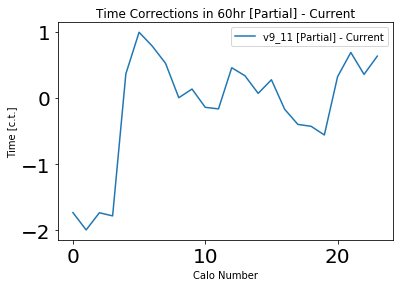

In [32]:
plt.plot([v9_11_partial_timeConstants[i] - x for i, x in enumerate(timeCorrectionConstants)],label='v9_11 [Partial] - Current')
plt.title("Time Corrections in 60hr [Partial] - Current")
plt.ylabel('Time [c.t.]')
plt.xlabel('Calo Number')
plt.legend()
plt.show()

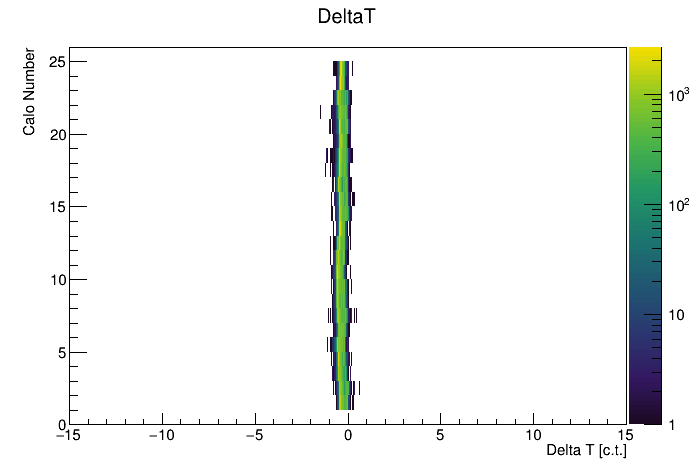

In [33]:
c=  r.TCanvas()
evwDeltaTCalo = f.Get("farline").Get("evwDeltaTCalo").Clone()
evwDeltaTCalo.GetXaxis().SetRangeUser(-15,15)
evwDeltaTCalo.Draw("colz")
c.SetLogz()
c.Draw()

---

Lets break this slope down by region

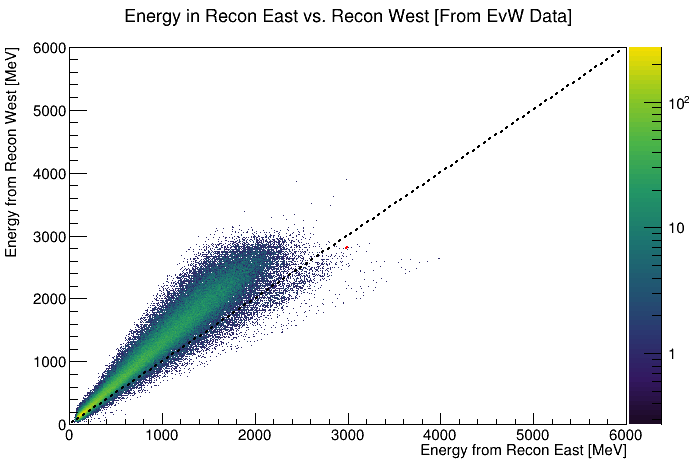

In [34]:
r.gStyle.SetOptFit(0)

c3 = r.TCanvas()
evwEnergyEvW = f.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.SetTitle("Energy in Recon East vs. Recon West [From EvW Data]")
#evwEnergyEvW.GetXaxis().SetRangeUser(0,3000)
#evwEnergyEvW.GetYaxis().SetRangeUser(0,4000)
evwEnergyEvW.Draw("colz")

onetoone = r.TF1("onetoone","pol1",0,6000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

slopeVecEnergyBin = []
xVec = []
stepsize = 20
for i in range(100,3000,stepsize):
    actualslopeEnergyRange = r.TF1("actualslopeEnergyRange","pol1",i,i+stepsize)
    actualslopeEnergyRange.FixParameter(0,0)
    evwEnergyEvW.Fit("actualslopeEnergyRange","REMBQ")
    slopeVecEnergyBin.append(actualslopeEnergyRange.GetParameter(1))
    xVec.append(i)

c3.SetLogz()
c3.Draw()

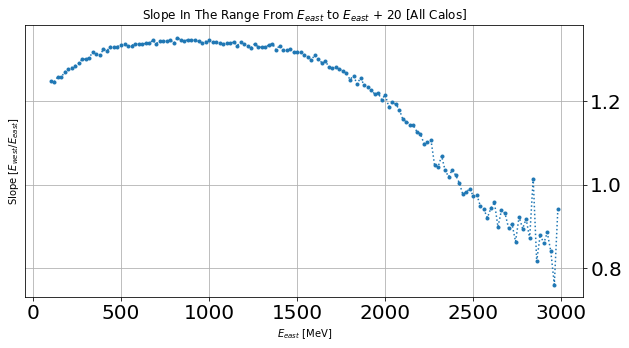

In [35]:
fix, ax = plt.subplots(figsize=(10,5))
ax.yaxis.tick_right()
plt.plot(xVec,slopeVecEnergyBin,':.')
plt.title(r"Slope In The Range From $E_{east}$ to $E_{east}$ + "+str(stepsize)+" [All Calos]")
plt.xlabel(r"$E_{east}$ [MeV]")
plt.ylabel(r"Slope [$E_{west} / E_{east}$]")
plt.grid()
plt.savefig("./Ding.png",transparent=True)
plt.show()

In [36]:
print(slopeVecEnergyBin)
print(xVec)

[1.2492424199118668, 1.245961578057108, 1.2579102034601284, 1.257035946245437, 1.2702425951089287, 1.277955125505756, 1.2807758686963453, 1.28570640552542, 1.2909703770287095, 1.300514312990684, 1.3008965067378955, 1.3045577787021256, 1.3184385948918118, 1.3122282658527744, 1.3105697109968761, 1.3242316531743252, 1.3211115077983637, 1.33117668048538, 1.328798048316324, 1.3310618726776278, 1.3353089746030131, 1.336852399686365, 1.3319456552368265, 1.333142747503838, 1.3381437414248925, 1.337011361848526, 1.3360811011761207, 1.3390356774891532, 1.3387195895937114, 1.3461465438284892, 1.337806847518362, 1.3446658448905617, 1.3449136467796783, 1.343795662583974, 1.3465589596178844, 1.3388030597897496, 1.3526167840124401, 1.345807447584323, 1.3450079199222365, 1.3471318628125761, 1.3465437638931632, 1.3467057262268334, 1.3437389608685344, 1.3404290915789263, 1.3431296416110086, 1.3468348583119834, 1.3418292307166402, 1.3424809533558684, 1.340449655467146, 1.3379216691647964, 1.3385328122481

  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 1 VARIABLE PARAMET

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 
W

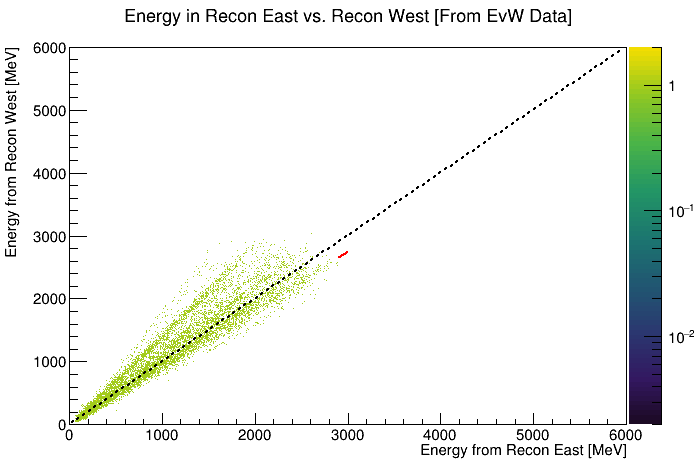

In [37]:
r.gStyle.SetOptFit(0)

c3 = r.TCanvas()

slopeVecEnergyBinCalo = []
for calo in range(1,25):
    #calo = 1
    evwEnergyEvW_i = f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").Clone()
    evwEnergyEvW_i.SetTitle("Energy in Recon East vs. Recon West [From EvW Data]")
    #evwEnergyEvW.GetXaxis().SetRangeUser(0,3000)
    #evwEnergyEvW.GetYaxis().SetRangeUser(0,4000)
    evwEnergyEvW_i.Draw("colz")

    onetoone = r.TF1("onetoone","pol1",0,6000)
    onetoone.SetParameters(0,1)
    onetoone.SetLineStyle(2)
    onetoone.SetLineColor(1)
    onetoone.Draw("SAME")

    slopeVecEnergyBin = []
    xVec = []
    stepsize = 100
    for i in range(100,4500,stepsize):
        actualslopeEnergyRange = r.TF1("actualslopeEnergyRange","pol1",i,i+stepsize)
        actualslopeEnergyRange.FixParameter(0,0)
        evwEnergyEvW_i.Fit("actualslopeEnergyRange","REMBQ")
        slopeVecEnergyBin.append(actualslopeEnergyRange.GetParameter(1))
        xVec.append(i)
        
    slopeVecEnergyBinCalo.append(slopeVecEnergyBin)

    c3.SetLogz()
    c3.Draw()

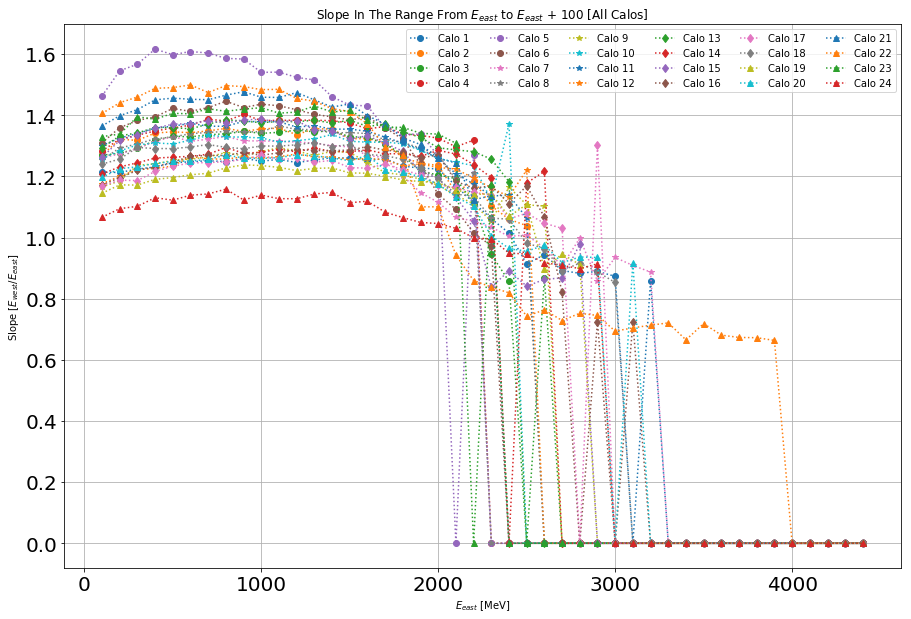

In [38]:
fix, ax = plt.subplots(figsize=(15,10))
for i, slopeVecEnergyBin in enumerate(slopeVecEnergyBinCalo):
    if(i < 6):
        fmt=':o'
    elif(i < 12):
        fmt=':*'
    elif(i < 18):
        fmt=':d'
    else:
        fmt=':^'
    plt.plot(xVec,slopeVecEnergyBin,fmt,label='Calo '+str(i+1))
plt.title(r"Slope In The Range From $E_{east}$ to $E_{east}$ + "+str(stepsize)+" [All Calos]")
plt.xlabel(r"$E_{east}$ [MeV]")
plt.ylabel(r"Slope [$E_{west} / E_{east}$]")

plt.legend(ncol=6)
plt.grid()
plt.show()

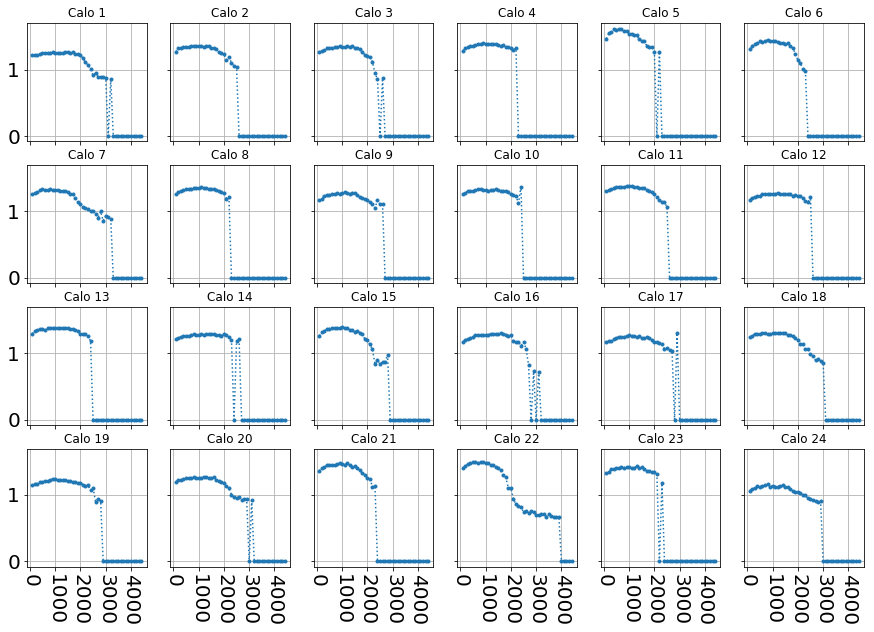

In [39]:
fix, ax = plt.subplots(4,6,figsize=(15,10),sharey=True,sharex=True)
for i, slopeVecEnergyBin in enumerate(slopeVecEnergyBinCalo):
    fmt=':.'
    axi = ax[int(np.floor(i/6))][i % 6]
    axi.plot(xVec,slopeVecEnergyBin,fmt,label='Calo '+str(i+1))
    axi.set_title("Calo "+str(i+1))
    #axi.set_xlabel(r"$E_{east}$ [MeV]")
    #axi.set_ylabel(r"Slope [$E_{west} / E_{east}$]")
    axi.grid()
    matplotlib.pyplot.sca(axi)

    plt.xticks(rotation=270)
    axi.set_xticks(np.arange(0, 5000, step=1000))

plt.show()

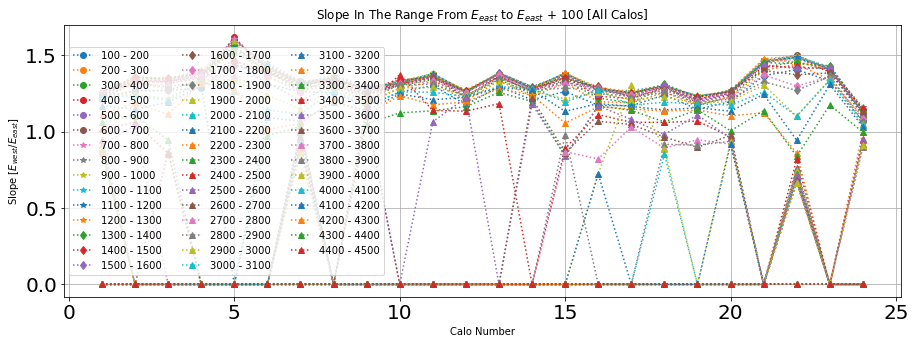

In [40]:
ding = zip(*slopeVecEnergyBinCalo)
fig,ax = plt.subplots(figsize=(15,5))
for i, dong in enumerate(ding):
    if(i < 6):
        fmt=':o'
    elif(i < 12):
        fmt=':*'
    elif(i < 18):
        fmt=':d'
    else:
        fmt=':^'
    plt.plot([x for x in range(1,25)],dong,fmt,label=str(xVec[i])+" - "+str(xVec[i]+stepsize))
plt.title(r"Slope In The Range From $E_{east}$ to $E_{east}$ + "+str(stepsize)+" [All Calos]")
plt.xlabel("Calo Number")
plt.ylabel(r"Slope [$E_{west} / E_{east}$]")
plt.grid()
plt.legend(ncol=3)
plt.show()